# Card-Heining-Kline event study examples

In [1]:
# Add BipartitePandas to system path, do not run this
# import sys
# sys.path.append('../../..')

In [2]:
# Import the BipartitePandas package 
# (Make sure you have installed it using pip install bipartitepandas)
import bipartitepandas as bpd

In [3]:
# For the example, we simulate bipartite labor data
sim_data = bpd.SimBipartite().sim_network()
bdf = bpd.BipartiteLong(sim_data)
bdf = bdf.clean_data()
display(bdf)

,i,j,y,t
0,0,135,1.563313,1
1,0,135,0.592790,2
2,0,135,1.147642,3
3,0,143,2.836777,4
4,0,138,1.407726,5
...,...,...,...,...
49995,9999,15,-4.529980,1
49996,9999,15,-2.771331,2
49997,9999,15,-1.317315,3
49998,9999,25,-0.859376,4


## Creating CHK event study plot

In [4]:
# We need to cluster the data first (using quartiles of mean firm-level income)
measures = bpd.measures.moments(measures='mean')
grouping = bpd.grouping.quantiles(n_quantiles=4)
bdf = bdf.cluster(measures=measures, grouping=grouping)

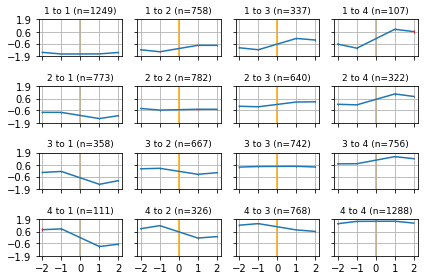

In [5]:
# Now to make the plots
bdf.plot_es_extended(periods_pre=2, periods_post=2)

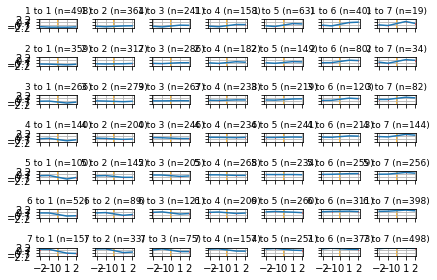

In [6]:
# Be careful not to include too many clusters!
measures = bpd.measures.moments(measures='mean')
grouping = bpd.grouping.quantiles(n_quantiles=7)
bdf = bdf.cluster(measures=measures, grouping=grouping)
bdf.plot_es_extended(periods_pre=2, periods_post=2)

## Getting extended event study dataframes

In [7]:
# BipartitePandas allows you to use clustered long data to generate event studies with more than 2 periods
# So first, cluster the data
bdf = bdf.cluster()
es_extended = bdf.get_es_extended(periods_pre=3, periods_post=2) # periods_post includes the first period after the transition
display(es_extended)

,i,t,g_l3,g_l2,g_l1,g_f1,g_f2,y_l3,y_l2,y_l1,y_f1,y_f2
0,0,4,3,3,3,5,5,1.563313,0.592790,1.147642,2.836777,1.407726
1,2,4,3,3,3,6,6,1.253325,0.632528,3.027184,1.124996,2.289954
2,3,4,7,7,7,2,5,-0.614310,0.429246,-1.282726,0.175630,1.319390
3,4,4,4,4,4,7,7,1.244143,-0.377666,-2.389321,-1.617291,-0.192779
4,5,4,5,5,5,3,5,0.225672,0.655739,2.162768,2.376679,1.180061
...,...,...,...,...,...,...,...,...,...,...,...,...
4990,9990,4,6,6,6,0,0,2.170820,0.069685,1.662551,0.198651,2.044333
4991,9993,4,5,5,5,2,2,-0.165670,0.656034,-1.607805,-1.071333,-1.098082
4992,9994,4,5,5,7,2,2,0.547146,0.596026,-1.379147,-1.456074,-1.414249
4993,9997,4,2,7,7,7,7,0.032658,-1.892814,-1.257257,-1.313094,-0.997809


In [8]:
# You can specify which columns to include (by default they are g and y)
es_extended = bdf.get_es_extended(periods_pre=3, periods_post=2, include=['j', 'y'])
display(es_extended)

,i,t,j_l3,j_l2,j_l1,j_f1,j_f2,y_l3,y_l2,y_l1,y_f1,y_f2
0,0,4,135,135,135,143,138,1.563313,0.592790,1.147642,2.836777,1.407726
1,2,4,132,132,132,179,179,1.253325,0.632528,3.027184,1.124996,2.289954
2,3,4,32,32,35,85,147,-0.614310,0.429246,-1.282726,0.175630,1.319390
3,4,4,69,65,58,21,21,1.244143,-0.377666,-2.389321,-1.617291,-0.192779
4,5,4,122,122,122,131,154,0.225672,0.655739,2.162768,2.376679,1.180061
...,...,...,...,...,...,...,...,...,...,...,...,...
4990,9990,4,178,178,176,173,160,2.170820,0.069685,1.662551,0.198651,2.044333
4991,9993,4,153,153,153,87,90,-0.165670,0.656034,-1.607805,-1.071333,-1.098082
4992,9994,4,154,125,28,77,93,0.547146,0.596026,-1.379147,-1.456074,-1.414249
4993,9997,4,89,33,33,22,20,0.032658,-1.892814,-1.257257,-1.313094,-0.997809


In [9]:
# You can specify column(s) for stable_pre or stable_post to keep only workers with those columns constant before/after the transition
es_extended = bdf.get_es_extended(periods_pre=3, periods_post=2, stable_pre='j', stable_post='j', include=['j', 'y'])
display(es_extended)

,i,t,j_l3,j_l2,j_l1,j_f1,j_f2,y_l3,y_l2,y_l1,y_f1,y_f2
0,2,4,132,132,132,179,179,1.253325,0.632528,3.027184,1.124996,2.289954
1,26,4,127,127,127,116,116,-0.034272,0.139015,-0.050219,-2.464338,0.620051
2,32,4,142,142,142,75,75,2.304636,1.799339,0.168811,0.165024,0.399810
3,52,4,57,57,57,18,18,-2.983352,-1.237000,-1.394893,-2.830575,-0.567120
4,94,4,37,37,37,8,8,-2.355763,-0.321845,-3.329474,-2.163653,-2.555589
...,...,...,...,...,...,...,...,...,...,...,...,...
643,9958,4,61,61,61,56,56,-0.798133,-2.433513,-1.199743,-1.973239,-2.163434
644,9970,4,131,131,131,83,83,0.015708,-0.542555,-0.367570,-1.442138,-1.443223
645,9972,4,172,172,172,159,159,0.439038,1.344953,-0.225301,1.326281,0.136839
646,9977,4,2,2,2,48,48,-2.463941,-0.377488,-2.059075,-0.885619,-0.737717


In [10]:
# You can specify column(s) for stable_pre or stable_post that aren't included
es_extended = bdf.get_es_extended(periods_pre=3, periods_post=2, stable_pre='g', stable_post='g', include=['j', 'y'])
display(es_extended)

,i,t,j_l3,j_l2,j_l1,j_f1,j_f2,y_l3,y_l2,y_l1,y_f1,y_f2
0,0,4,135,135,135,143,138,1.563313,0.592790,1.147642,2.836777,1.407726
1,2,4,132,132,132,179,179,1.253325,0.632528,3.027184,1.124996,2.289954
2,4,4,69,65,58,21,21,1.244143,-0.377666,-2.389321,-1.617291,-0.192779
3,26,4,127,127,127,116,116,-0.034272,0.139015,-0.050219,-2.464338,0.620051
4,32,4,142,142,142,75,75,2.304636,1.799339,0.168811,0.165024,0.399810
...,...,...,...,...,...,...,...,...,...,...,...,...
1135,9977,4,2,2,2,48,48,-2.463941,-0.377488,-2.059075,-0.885619,-0.737717
1136,9978,4,148,148,148,136,136,0.969456,-1.005873,0.819791,1.050466,-1.235183
1137,9985,4,154,151,151,187,186,-0.385708,3.382026,0.554474,1.301373,1.389400
1138,9990,4,178,178,176,173,160,2.170820,0.069685,1.662551,0.198651,2.044333


In [11]:
# You can also redefine what column to use to define a transition
es_extended = bdf.get_es_extended(periods_pre=3, periods_post=2, stable_pre='g', stable_post='j', include=['j', 'g', 'y'], transition_col='g')
display(es_extended)
display(es_extended[es_extended['j_l3'] != es_extended['j_l2']])

,i,t,j_l3,j_l2,j_l1,j_f1,j_f2,g_l3,g_l2,g_l1,g_f1,g_f2,y_l3,y_l2,y_l1,y_f1,y_f2
0,2,4,132,132,132,179,179,3,3,3,6,6,1.253325,0.632528,3.027184,1.124996,2.289954
1,4,4,69,65,58,21,21,4,4,4,7,7,1.244143,-0.377666,-2.389321,-1.617291,-0.192779
2,32,4,142,142,142,75,75,5,5,5,2,2,2.304636,1.799339,0.168811,0.165024,0.399810
3,52,4,57,57,57,18,18,4,4,4,1,1,-2.983352,-1.237000,-1.394893,-2.830575,-0.567120
4,94,4,37,37,37,8,8,7,7,7,1,1,-2.355763,-0.321845,-3.329474,-2.163653,-2.555589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,9942,4,182,189,186,108,108,6,6,6,3,3,1.289218,1.809075,2.713886,0.482341,0.495835
750,9947,4,28,26,26,14,14,7,7,7,1,1,-3.738087,-2.423539,-1.733056,-0.756891,-2.922484
751,9970,4,131,131,131,83,83,3,3,3,2,2,0.015708,-0.542555,-0.367570,-1.442138,-1.443223
752,9977,4,2,2,2,48,48,1,1,1,4,4,-2.463941,-0.377488,-2.059075,-0.885619,-0.737717


,i,t,j_l3,j_l2,j_l1,j_f1,j_f2,g_l3,g_l2,g_l1,g_f1,g_f2,y_l3,y_l2,y_l1,y_f1,y_f2
1,4,4,69,65,58,21,21,4,4,4,7,7,1.244143,-0.377666,-2.389321,-1.617291,-0.192779
5,96,4,119,101,121,11,11,3,3,3,1,1,-1.181810,0.573207,-0.377934,-3.260707,-0.033065
14,293,4,182,181,181,29,29,6,6,6,7,7,1.748779,3.018884,1.852016,1.031814,0.680243
25,470,4,63,58,58,97,97,4,4,4,2,2,-0.431727,-2.097672,-1.417104,0.292493,-1.301013
29,521,4,130,108,108,147,147,3,3,3,5,5,2.138119,0.119339,1.350443,3.019683,1.650033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,9693,4,177,184,184,151,151,6,6,6,5,5,1.144546,2.804746,0.298966,1.539179,1.109300
739,9805,4,51,44,44,151,151,4,4,4,5,5,-0.941982,-1.283572,-0.918985,-1.143909,0.744518
746,9904,4,72,57,57,1,1,4,4,4,1,1,0.097460,-1.897193,-0.652517,-1.097701,-0.791690
749,9942,4,182,189,186,108,108,6,6,6,3,3,1.289218,1.809075,2.713886,0.482341,0.495835
